In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc  # import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle(r'D:\Py_Prjs\OPA_repo\ClusterAnalysis\KMeans\Data\df_allInfo_clean.pkl')
df_numeric = df.select_dtypes(include=['float64'])
cnt = df_numeric.isnull().sum()
X = df_numeric.fillna(df_numeric.median())
sc = MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns, index=X.index)

In [12]:
plt.figure(figsize=(50, 10), dpi=500)

Z = shc.linkage(X_scaled, method = 'ward', metric = 'euclidean')
color_threshold = 1.75
plt.title("HCA dendrogram")
d = shc.dendrogram(Z, labels = X_scaled.index, leaf_rotation = 90., color_threshold = color_threshold)

clusters = shc.fcluster(Z, t=color_threshold, criterion='distance')

# count number of clusters
num_clusters = len(set(clusters))

# print result
print("Number of clusters:", num_clusters)

plt.show()

Number of clusters: 28


In [5]:
## Insert your code here
n_clusters = 502

s_scores = []
ca_scores = []

for n_clst in range(2, n_clusters + 1) :
    
    cluster = AgglomerativeClustering(n_clusters = n_clst)

    cluster.fit(X_scaled)

    labels = cluster.labels_

    s_score = silhouette_score(X_scaled, labels, metric='sqeuclidean')
    ca_score = calinski_harabasz_score(X_scaled, labels)
    s_scores.append(s_score)
    ca_scores.append(ca_score)


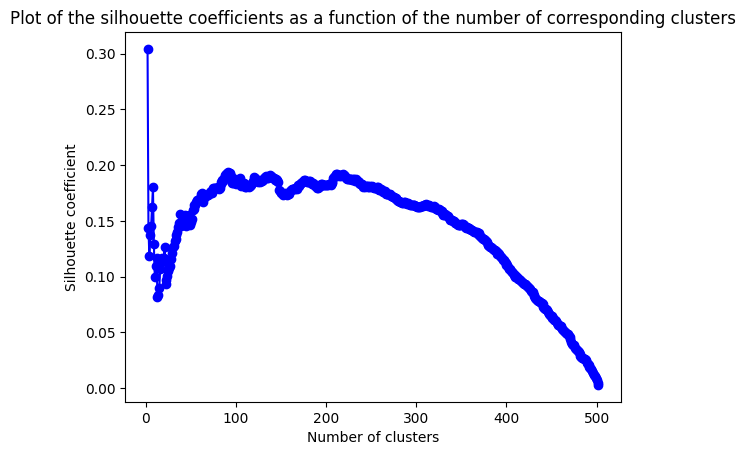

In [6]:
plt.plot(list(range(2, n_clusters + 1)), s_scores, 'bo-')
plt.title('Plot of the silhouette coefficients as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

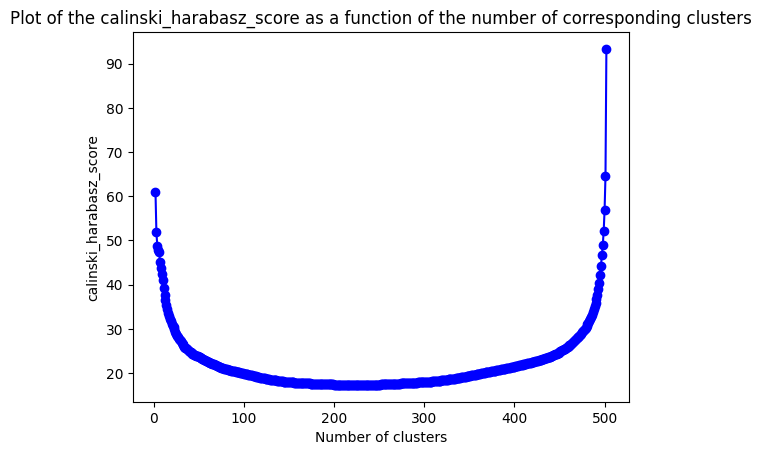

In [7]:
plt.plot(list(range(2, n_clusters + 1)), ca_scores, 'bo-')
plt.title('Plot of the calinski_harabasz_score as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

feature selection 

In [8]:
#https://jundongl.github.io/scikit-feature/tutorial.html
from skfeature.utility import construct_W
from skfeature.function.similarity_based import lap_score
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":26,'t':1} # using k value decided from knn method
W = construct_W.construct_W(X_scaled.to_numpy(), **kwargs_W)
score = lap_score.lap_score(X_scaled.to_numpy(), W=W)
idx = lap_score.feature_ranking(score)

# selected_features = X_scaled.to_numpy()[:, idx[0:num_fea]]

In [9]:
df_feature_imp = pd.merge(pd.Series(idx, name='rank'), pd.Series(X_scaled.columns, name='col'), right_index=True, left_index=True)\
                .sort_values('rank')

In [10]:
#df_feature_imp.set_index('col')
df_nc = pd.DataFrame(cnt, columns=["null count"], index=cnt.index)
df_feature_imp = df_feature_imp.set_index('col').join(df_nc)
df_feature_imp.head(47)

,rank,null count
col,,
profitMargins,0,0
operatingMargins,1,0
fullTimeEmployees,2,5
shortRatio,3,0
heldPercentInstitutions,4,0
pegRatio,5,6
targetLowPrice,6,14
enterpriseValue,7,0
sharesShort,8,0


In [15]:
selected_features = list(df_feature_imp[(df_feature_imp['rank'] <= 30) & (df_feature_imp['null count'] <= 9)].index) # prioritizing non null features, (rank 30 was the last with 0 null count)

In [30]:
selected_features

['profitMargins',
 'operatingMargins',
 'fullTimeEmployees',
 'shortRatio',
 'heldPercentInstitutions',
 'pegRatio',
 'enterpriseValue',
 'sharesShort',
 'heldPercentInsiders',
 'sharesPercentSharesOut',
 'fiftyTwoWeekLow',
 'priceToSalesTrailing12Months',
 'twoHundredDayAverage',
 'trailingEps',
 'enterpriseToRevenue',
 'fiftyDayAverage',
 'revenuePerShare',
 'grossProfits',
 'sharesShortPriorMonth',
 'ebitdaMargins',
 'grossMargins']

In [16]:
len(selected_features)

21

In [17]:
## Insert your code here
# n_clusters = 502

s_scores = []
ca_scores = []

for n_clst in range(24, 29) :
    
    cluster = AgglomerativeClustering(n_clusters = n_clst)

    cluster.fit(X_scaled[selected_features])

    labels = cluster.labels_

    s_score = silhouette_score(X_scaled[selected_features], labels, metric='sqeuclidean')
    ca_score = calinski_harabasz_score(X_scaled[selected_features], labels)
    s_scores.append(s_score)
    ca_scores.append(ca_score)


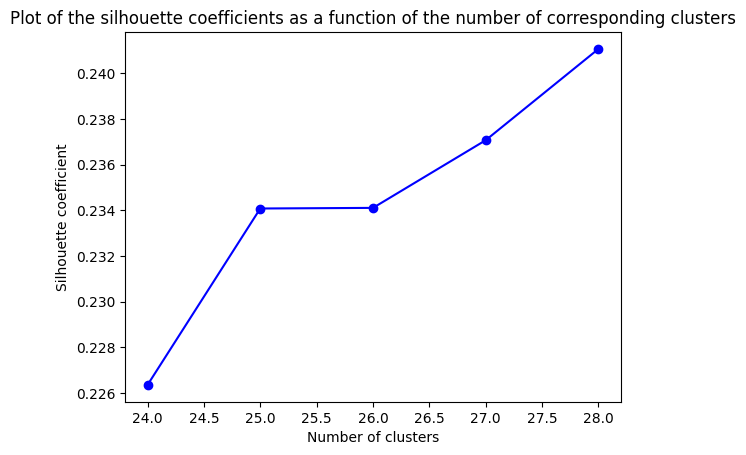

In [18]:
plt.plot(list(range(24, 29)), s_scores, 'bo-')
plt.title('Plot of the silhouette coefficients as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

In [189]:
# from scipy.signal import argrelextrema
# argrelextrema(np.array(s_scores), np.greater)

(array([  1,   6,  11,  18,  20,  23,  31,  37,  42,  45,  47,  51,  56,
         62,  66,  70,  75,  77,  79,  84,  86,  90,  95, 108, 111, 114,
        120, 124, 127, 129, 133, 140, 142, 148, 154, 157, 162, 164, 166,
        171, 173, 176, 187, 191, 193, 198, 203, 207, 209, 214, 216, 219,
        223, 225, 228, 231, 237, 241, 251, 255, 258, 261, 264, 270, 276,
        282, 289, 292, 295, 297, 327, 338, 341, 353, 356, 366, 373, 396,
        403, 409, 411, 415, 424], dtype=int64),)

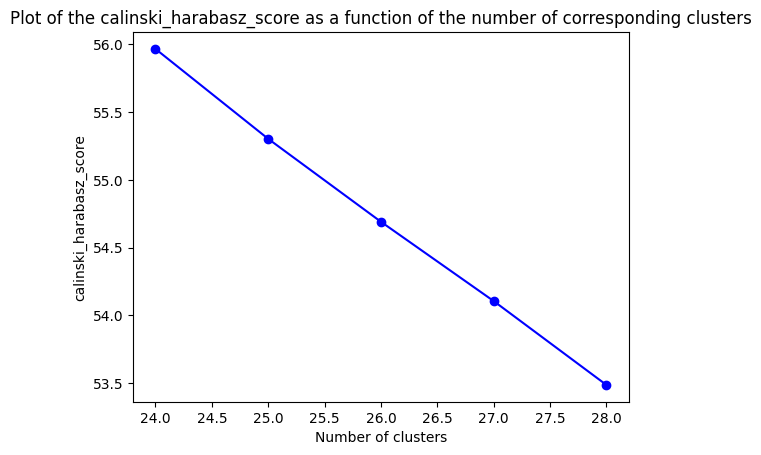

In [19]:
plt.plot(list(range(24, 29)), ca_scores, 'bo-')
plt.title('Plot of the calinski_harabasz_score as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

Comparison of the selected features result against KMeans from the all features selection

In [20]:
# repeat elbow analysis, storing all results
## Insert your code here
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt 
range_n_clusters = list(range(24, 29)) 
distortions = []
df_k_cluster = dict()

for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters = n_clusters, random_state=42)
    cluster.fit(X_scaled[selected_features])
    c = cluster.cluster_centers_
    l = cluster.labels_
    disto = sum(np.min(cdist(X_scaled[selected_features], c, 'euclidean'), axis=1)) / np.size(X_scaled[selected_features], axis = 0)
    distortions.append(disto)
    df_k_cluster[n_clusters] = [pd.merge(pd.Series(X.index), pd.Series(l, name='cluster'), right_index=True, left_index=True), disto]


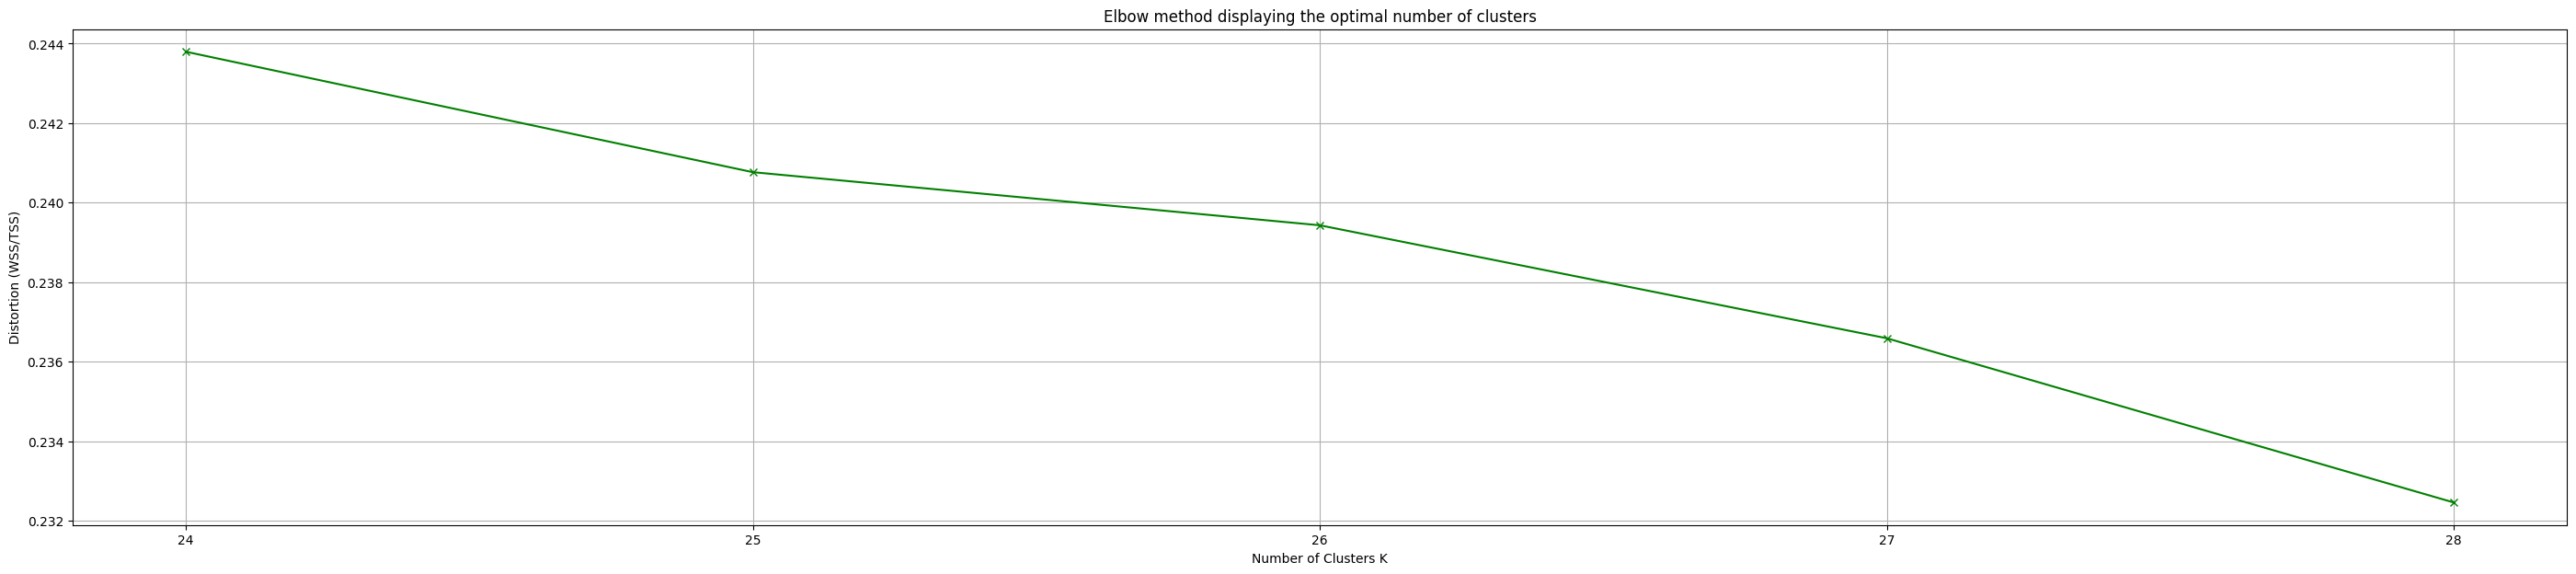

In [21]:

plt.figure(figsize=(35, 7))
plt.xticks(np.arange(24, 29, step=1))
plt.grid(visible=True)
plt.plot(range_n_clusters, distortions, 'gx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Elbow method displaying the optimal number of clusters')


plt.show()

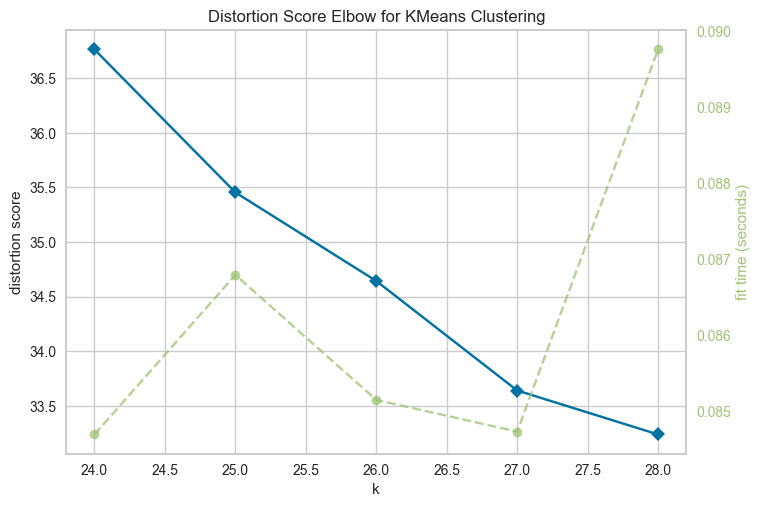

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(24,29))
visualizer.fit(X_scaled[selected_features])
visualizer.show()

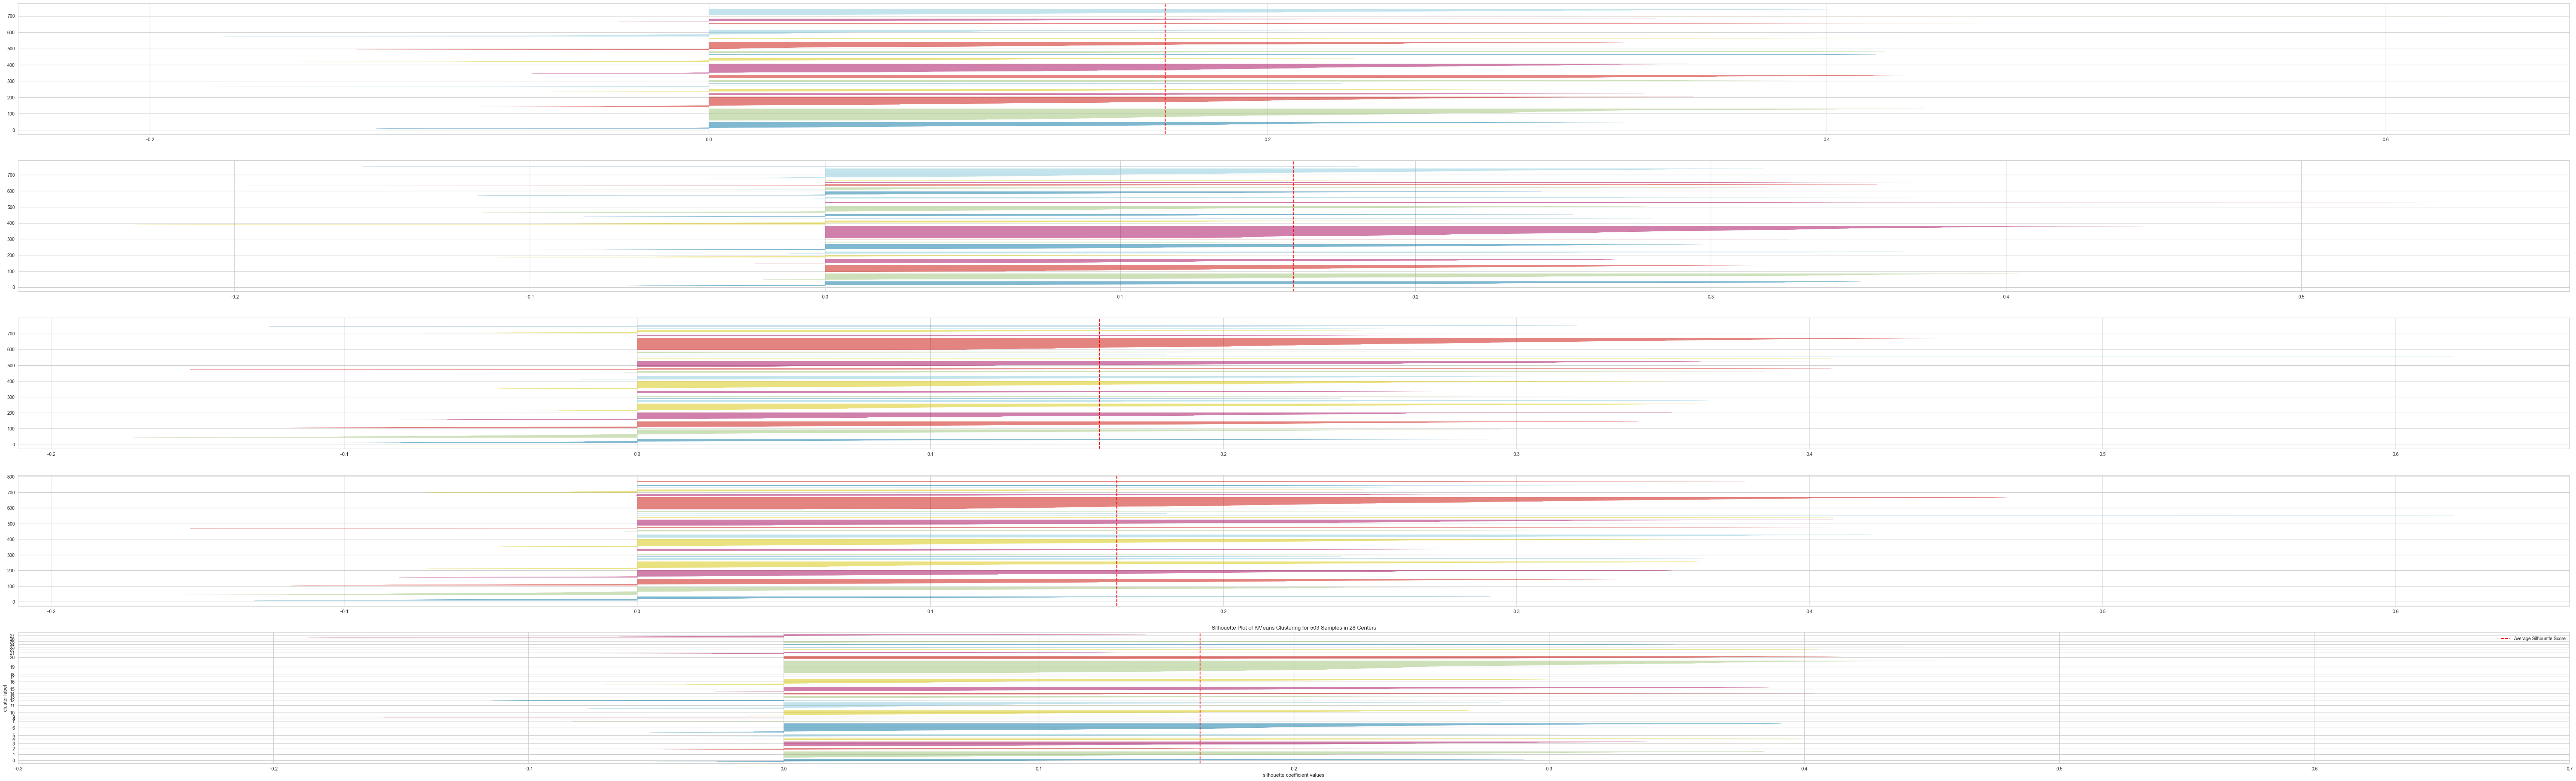

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 503 Samples in 28 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(5, 1, figsize=(100,30))
q = 0
for i in range(24, 29):
    km = KMeans(n_clusters=i, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q])
    visualizer.fit(X_scaled[selected_features])
    q = q + 1
visualizer.show()

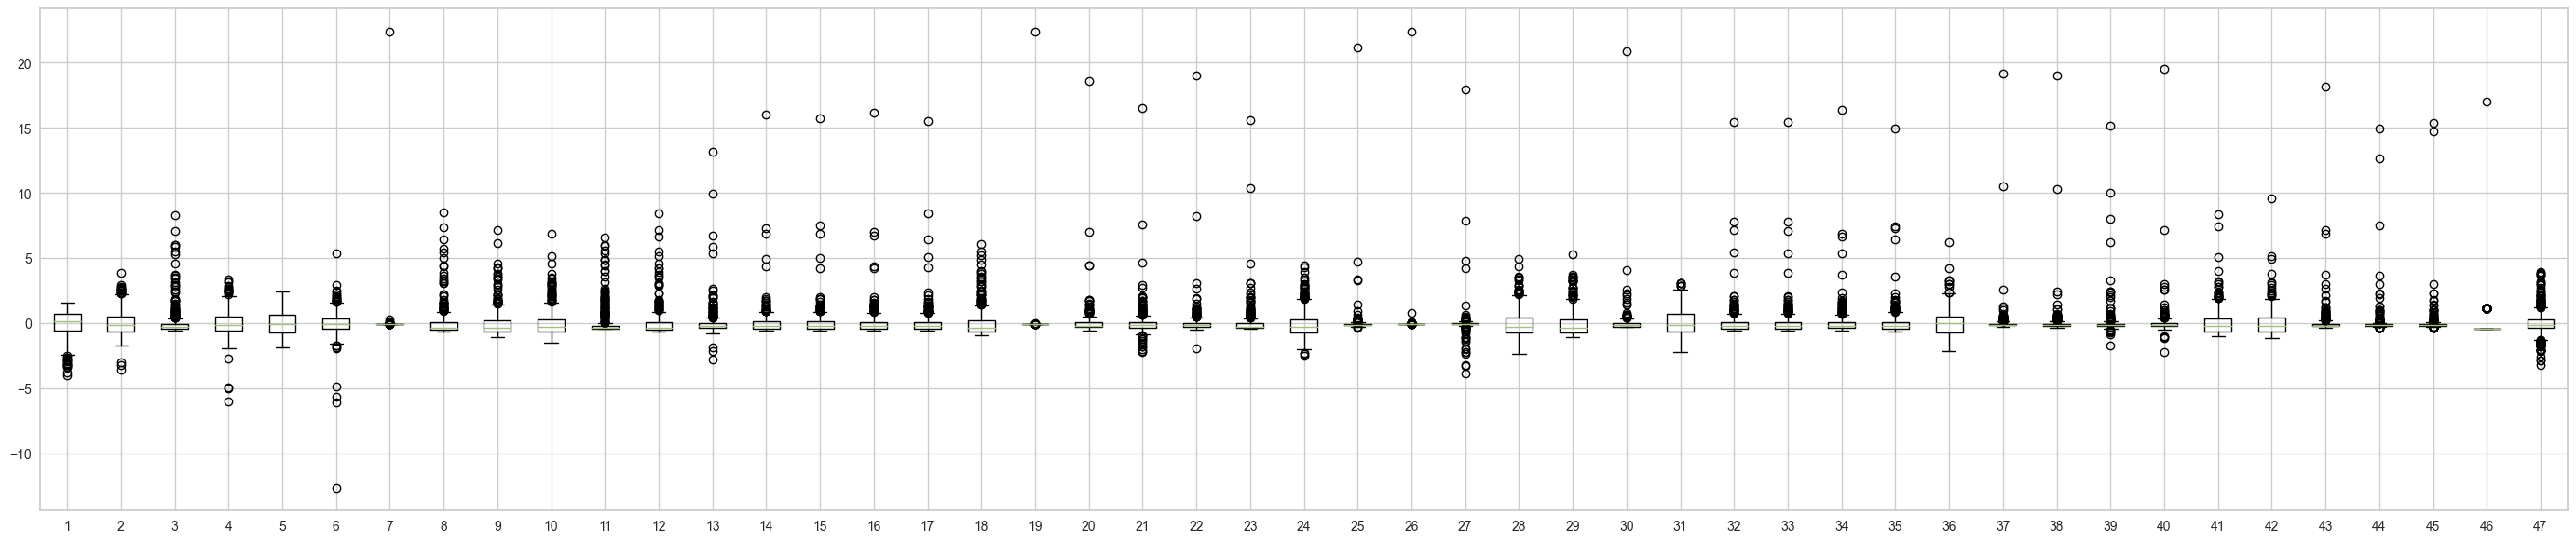

In [120]:
sc = StandardScaler()
X_scaled_sc = pd.DataFrame(sc.fit_transform(X), columns=X.columns, index=X.index)
plt.figure(figsize=(35, 7))
plt.boxplot(X_scaled_sc);

In [28]:
#WSS, BSS calculation

wss = dict()
bss = dict()
N_max = 28
for N in range(24, N_max + 1):
    kmeans = KMeans(n_clusters = N)
    kmeans.fit(X_scaled[selected_features])
    c = kmeans.cluster_centers_
    l = kmeans.labels_
    print(c)
    print(l)
    wss[N] = 0
    bss[N] = 0
    for i in range(N):
        wss[N] = wss[N] + ((cdist(X_scaled[selected_features][l == i], np.tile(c[i], (47, 1)), 'euclidean').min(axis=1))**2).sum()
        bss[N] = bss[N] + sum(l == i)*(cdist(np.tile(X_scaled[selected_features].mean(axis = 0), (47, 1)), np.tile(c[i], (47, 1)), 'euclidean').mean())

[[6.76535134e-01 5.53533591e-01 2.54485373e-02 1.40692641e-01
  7.79390056e-01 1.72994027e-01 1.60405411e-01 3.52385701e-02
  1.38057458e-02 9.64435240e-02 2.96970966e-02 5.90816245e-02
  3.04616555e-02 1.16070497e-01 2.57619701e-01 3.22527064e-02
  8.15517063e-04 3.76957482e-02 3.99944537e-02 3.78339151e-01
  1.96858588e-01]
 [7.50566545e-01 7.24074967e-01 5.03978415e-03 1.86896437e-01
  8.39202815e-01 1.90147850e-01 1.63853407e-01 3.27097417e-02
  2.11060199e-02 1.05494506e-01 4.27638906e-02 4.05149942e-01
  4.41550552e-02 1.10418184e-01 6.02281272e-01 4.19410941e-02
  9.83392720e-05 2.11283279e-02 3.13204972e-02 6.68801331e-01
  6.63970076e-01]
 [7.22610298e-01 7.11914736e-01 1.87549763e-02 1.47997835e-01
  5.75439058e-01 1.71452338e-01 1.89310462e-01 6.65711410e-02
  2.74571114e-02 7.72335603e-02 3.18487136e-02 1.97017582e-01
  3.14287076e-02 1.16071711e-01 3.86492984e-01 3.18040495e-02
  1.57229520e-04 7.53136043e-02 6.82246962e-02 5.82467072e-01
  5.39779324e-01]
 [6.54189379e-01

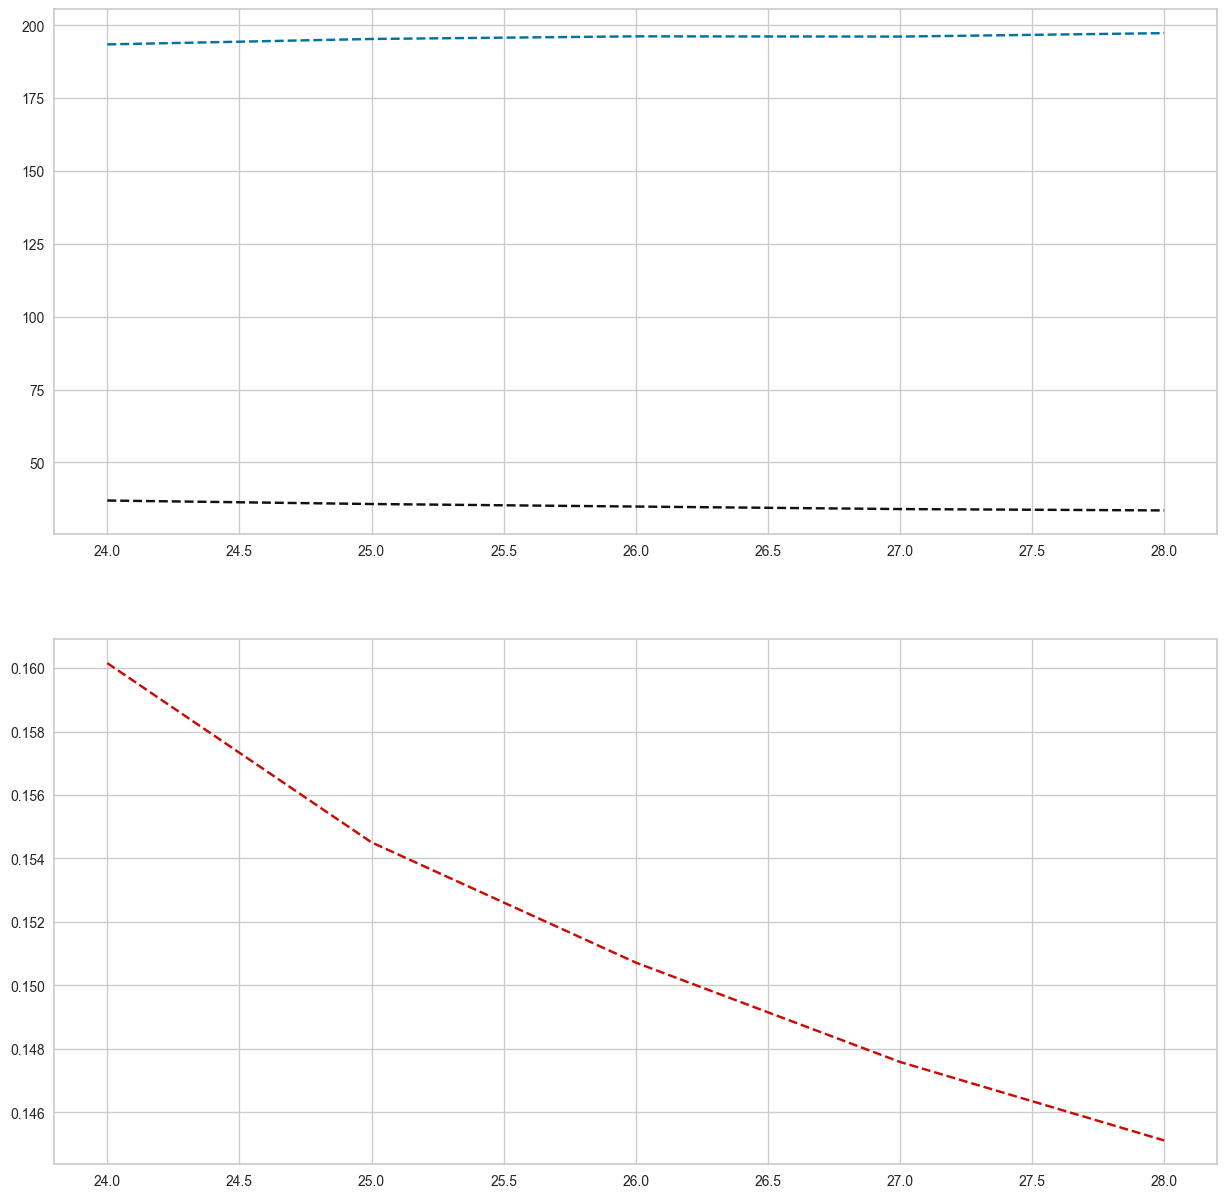

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(wss.keys(), wss.values(), 'k--')
plt.plot(bss.keys(), bss.values(), 'b--')
plt.subplot(2, 1, 2)
plt.plot(bss.keys(), 
        np.array(list(wss.values()))/(np.array(list(wss.values())) + np.array(list(bss.values()))), 'r--')